In [183]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Get a feel of the data (Using NY-Times 2019 Quotes)

Let's first load the data and convert it to tabular form

In [3]:
data = []
with open('quotes-2019-nytimes.json') as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
def generate_data_model(data,n):
    """
    Converting json to tabular data
    Restrictions:
    -> Allowing up to 3 speakers and their correspond probabilities
    -> Not looking at urls, quids
    """
    # Create initial dataframe 
    df = pd.DataFrame()
    
    # For each line in json document retrieve info and append to df
    for i in range(n):
        current_data = dict(data[i])
        current_df = pd.DataFrame()
        current_df['quoteID'] = [current_data['quoteID']]
        current_df['quotation'] = [current_data['quotation']]
        current_df['date'] = [current_data['date']]
        current_df['numOccurrences'] = [current_data['numOccurrences']]
        current_df['phase'] = [current_data['phase']]
        
        # Select only the 3 most probable speakers of the quote
        for j in range(3):
            if j < len(current_data['probas']):
                current_df[f"{'speaker'+str(j+1)}"] = [current_data['probas'][j][0]]
                current_df[f"{'probas'+str(j+1)}"] = [current_data['probas'][j][1]]
            else:
                current_df[f"{'speaker'+str(j+1)}"] = [np.nan]
                current_df[f"{'probas'+str(j+1)}"] = [0]
        df = df.append(current_df)
    
    
    # Convert numeric columns to int (stored as object prior)
    df['numOccurrences'] = pd.to_numeric(df['numOccurrences'])
    df['count'] = 1
    
    return df

We will load a subset of the data. Loading 50.000 quotes:

In [5]:
df = generate_data_model(data,50000)

In [18]:
test_code_df = generate_data_model(data, 1000)

## Analysis

## 1. Who has most quotes attributed to them?

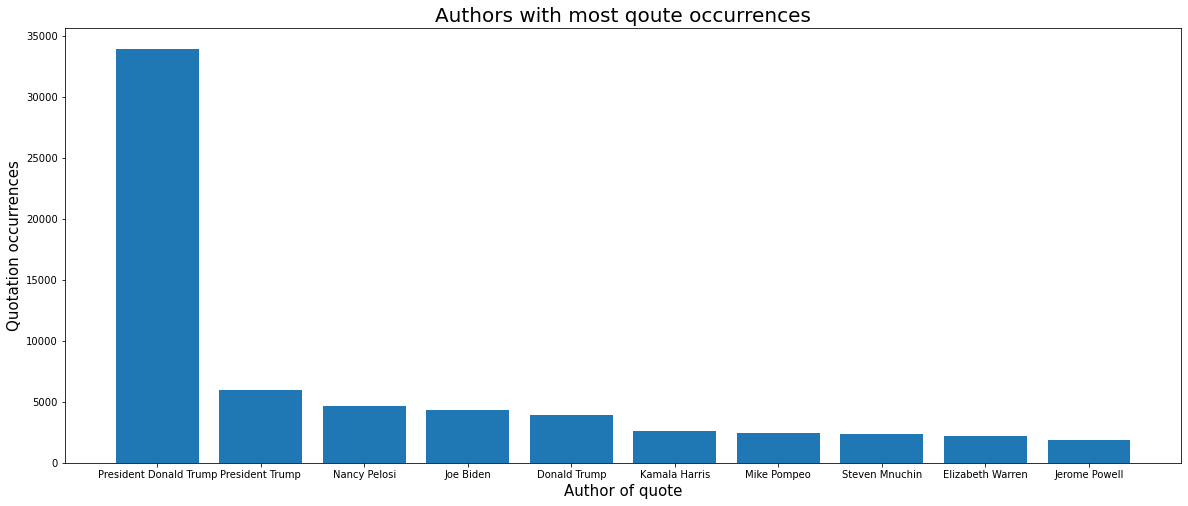

In [ ]:
top_speakers = df.loc[df.speaker1 != 'None'].groupby(by=['speaker1']).sum().sort_values(by='numOccurrences',ascending=False).reset_index()
fig,ax = plt.subplots(figsize=(20,8))
ax.bar(top_speakers.speaker1[:10],top_speakers.numOccurrences[:10])
ax.set_xlabel("Author of quote",size=15)
ax.set_ylabel("Quotation occurrences",size=15)
#plt.xticks(top_speakers.speaker1[:10],rotation=90)
ax.set_title("Authors with most qoute occurrences",size=20)
plt.show()

We see that most of the quotes are from politicians - probably because of the profile of NY-times

## 2. How does the daily number of quotes vary throughout the year?

In [ ]:
df['date_clean'] = df.apply(lambda x: x['date'][:10],axis=1)

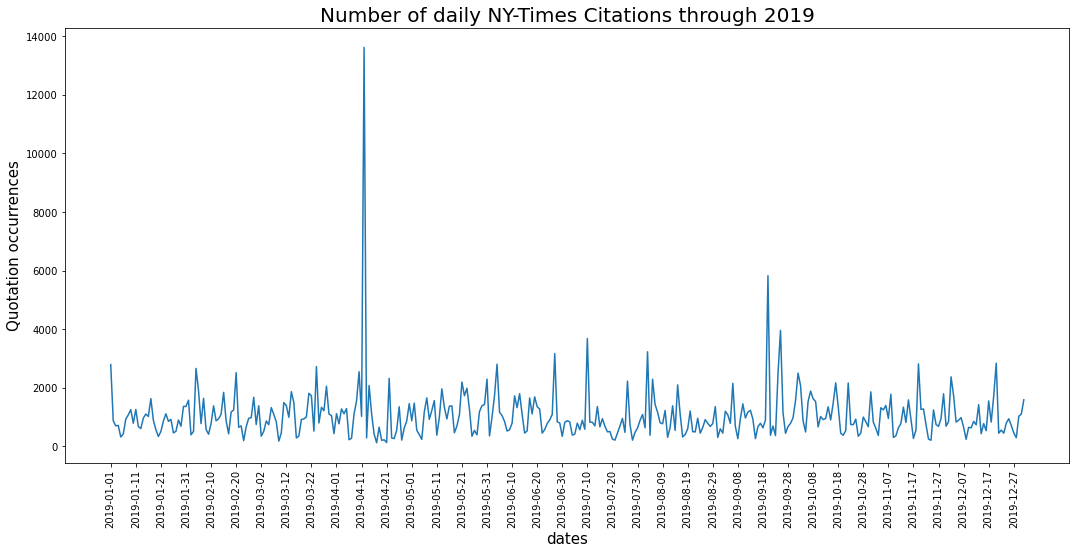

In [ ]:
time = df.groupby(['date_clean']).sum().index
quote_num = df.groupby(['date_clean']).sum()['numOccurrences']
fig,ax = plt.subplots(figsize=(18,8))
ax.plot(time,quote_num)
ax.set_xlabel("dates",size=15)
plt.xticks(time[::10],rotation=90)
ax.set_ylabel("Quotation occurrences",size=15)
ax.set_title("Number of daily NY-Times Citations through 2019",size=20)
plt.show()


Comment: We see a big spike of quotes originating from April 

## 3. How does the distribution of quote occurences look?

Text(0.5, 1.0, 'Distribution of quote occurrences (Occurrences capped at 60)')

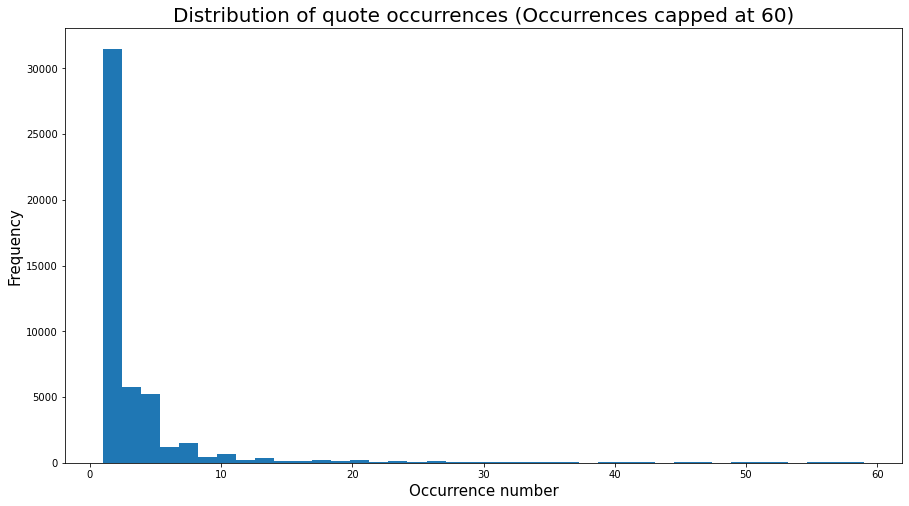

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
ax.hist(df.numOccurrences[df.numOccurrences < 60],bins=40);
ax.set_xlabel("Occurrence number",size=15)
ax.set_ylabel("Frequency",size=15)
ax.set_title("Distribution of quote occurrences (Occurrences capped at 60)",size=20)

## 4. How does the most frequent quoters vary throughout the year?

In [276]:
#Extracting dataset and formatting date
quotes_per_date = test_code_df.copy()
quotes_per_date['date'] = quotes_per_date['date'].apply(lambda x: dt.datetime.strptime(x[:10], '%Y-%m-%d'))


In [277]:
#Extracting dataset and formatting date to show only month
quotes_per_month = test_code_df.copy()
quotes_per_month['date'] = quotes_per_month['date'].apply(lambda x: dt.datetime.strptime(x[:7], '%Y-%m'))

In [278]:
#Pivoting table such that each column is a speaker and index is date
#Merging Donald Trump quotations and dropping None as well
quotes_per_date = quotes_per_date.pivot_table('numOccurrences', ['date'], 'speaker1', fill_value=0)
quotes_per_date['Donald Trump'] = quotes_per_date['Donald Trump'] + \
                                  quotes_per_date['President Donald Trump'] + \
                                  quotes_per_date['President Trump']
quotes_per_date.drop(['None', 'President Donald Trump', 'President Trump'], axis=1, inplace=True)

quotes_per_month = quotes_per_month.pivot_table('numOccurrences', ['date'], 'speaker1', fill_value=0)
quotes_per_month['Donald Trump'] = quotes_per_month['Donald Trump'] + \
                                   quotes_per_month['President Donald Trump'] + \
                                   quotes_per_month['President Trump']
quotes_per_month.drop(['None', 'President Donald Trump', 'President Trump'], axis=1, inplace=True)

In [279]:
#Cummulative representation of quotes
cummulative_quotes_per_date = quotes_per_date.cumsum(axis=0)
cummulative_quotes_per_month = quotes_per_month.cumsum(axis=0)


### Code for making a .mp4 file with the animation

In [281]:
import bar_chart_race as bcr

In [287]:
quotes_per_date_plot = bcr.bar_chart_race(cummulative_quotes_per_month, filename='quotes_per_date_plot.mp4',
                                          n_bars=10, filter_column_colors=True, period_length=1000, steps_per_period=20,
                                          title='Most frequently quoted people', period_fmt='%B %Y',    
                                          shared_fontdict={'family' : 'Helvetica', 'color' : '.1'}
)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 131 missing from current fon

### Time series quote occurences for the most frequent quoters

Plottet by week below


In [170]:
#Grouping by week and aggregating occurrences
quotes_per_week = quotes_per_date.copy()
quotes_per_week['week'] = quotes_per_week.index
quotes_per_week['week'] = quotes_per_week['week'].apply(lambda x: dt.date.isocalendar(x)[1])
quotes_per_week = quotes_per_week.groupby('week').sum()

In [230]:
#Cummulative representation of quotes per week
cummulative_quotes_per_week = quotes_per_week.cumsum(axis=0)

In [218]:
#Extract most frequent quoters
top_quoters = quotes_per_week.sum(axis=0).nlargest(6).index

In [288]:
#Extracting these from week dataset
top_quotes_per_week = quotes_per_week[top_quoters]
cummulative_top_quotes_per_week = cummulative_quotes_per_week[top_quoters]

### Normal Plot

Text(0, 0.5, 'Number of quotations')

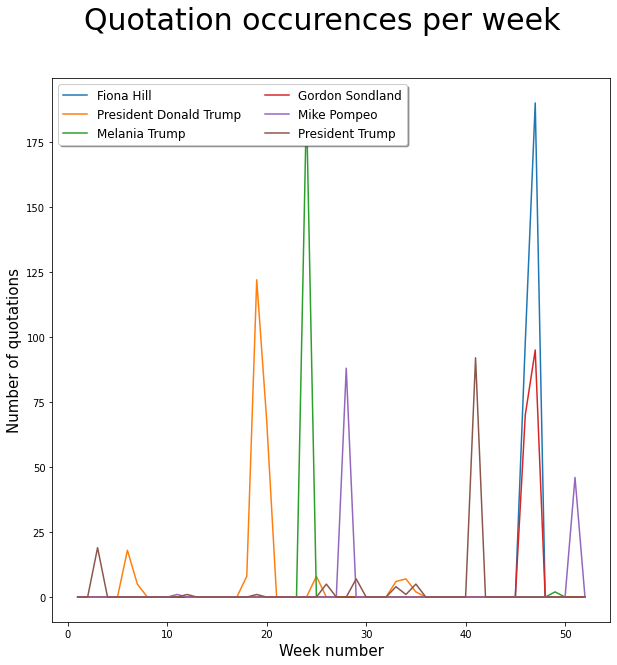

In [245]:
fig = plt.figure(figsize=(10, 10))
labels=[]
for quoter in top_quoters:
    plt.plot(top_quotes_per_week.index, top_quotes_per_week[quoter])
    labels.append(quoter)

plt.legend(labels, ncol=2, loc='upper left', fancybox=True, shadow=True,
           fontsize=12)
fig.suptitle('Quotation occurences per week', fontsize=30)
plt.xlabel('Week number', fontsize=15)
plt.ylabel('Number of quotations', fontsize=15)


### Cummulative plot

Text(0, 0.5, 'Number of quotations')

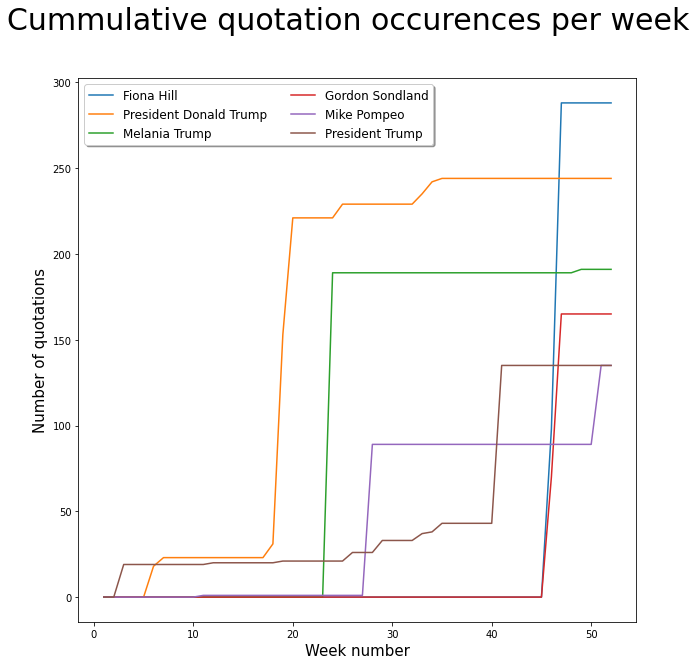

In [246]:
fig = plt.figure(figsize=(10, 10))
labels=[]
for quoter in top_quoters:
    plt.plot(cummulative_top_quotes_per_week.index, cummulative_top_quotes_per_week[quoter])
    labels.append(quoter)

plt.legend(labels, ncol=2, loc='upper left', fancybox=True, shadow=True,
           fontsize=12)
fig.suptitle('Cummulative quotation occurences per week', fontsize=30)
plt.xlabel('Week number', fontsize=15)
plt.ylabel('Number of quotations', fontsize=15)

